# Transformation

You're absolutely right to draw attention to the musicality of language and how cultural and linguistic norms shape communication styles. French, particularly as heard in Renoir's *The Rules of the Game* (*La Règle du Jeu*), is indeed striking in its melodic contours. The language carries a rhythm and intonation that mirrors its cultural emphasis on clarity and expressiveness. The French, especially in Renoir’s social commentary, use tone almost like a symphony to convey emotional and relational shifts.

### French as Musical
In cooperative settings, French often adopts a warm, lilting cadence, much like the parasympathetic tone you describe. This fluidity, with its nasal vowels and rhythmic syllables, feels almost like a waltz. But when the conversation turns adversarial, the melody sharpens. The tempo quickens, the volume rises, and the inherent syllabic rhythm adds a percussive force, creating a dynamic interplay akin to a dramatic orchestral piece.

### English Aristocracy: Subtle Crescendos
English, especially in its aristocratic register, is starkly different. Adversarial exchanges are often veiled in politeness or irony, with volume and tempo deliberately suppressed to maintain composure. The slowness and controlled cadence—what you astutely connect to a kind of adversarial subtlety—serve to signal power through restraint. The battle is fought in nuances rather than overt displays.

### Comparison Across Languages
What you're describing is essentially the difference in how cultures encode conflict and cooperation in their linguistic "music." French, with its penchant for directness and theatrical flair, thrives on dynamic shifts. English, particularly in its upper-class form, uses understated tones and carefully chosen pauses, turning the adversarial into a game of implications. In contrast, languages like Japanese might reflect deference even in disagreement, softening adversarial tones to maintain harmony.

Renoir’s world, with its layers of aristocratic hypocrisy and social games, brings the "musicality of conflict" to the forefront. The characters’ tempers flare in crescendos, their rivalries and romances spilling into verbal flourishes that are uniquely French. The language embodies the film's themes: when the tone becomes louder and faster, it mirrors the characters' unraveling social facades.

The French lack of subtlety that you mention is not a flaw but a feature—it's theatrical, emotive, and unapologetic. In *The Rules of the Game*, the language is an instrument, reinforcing the drama of cooperation and conflict as it unfolds. The tonal shifts are part of the grand performance, reflecting the human comedy Renoir so meticulously captures.

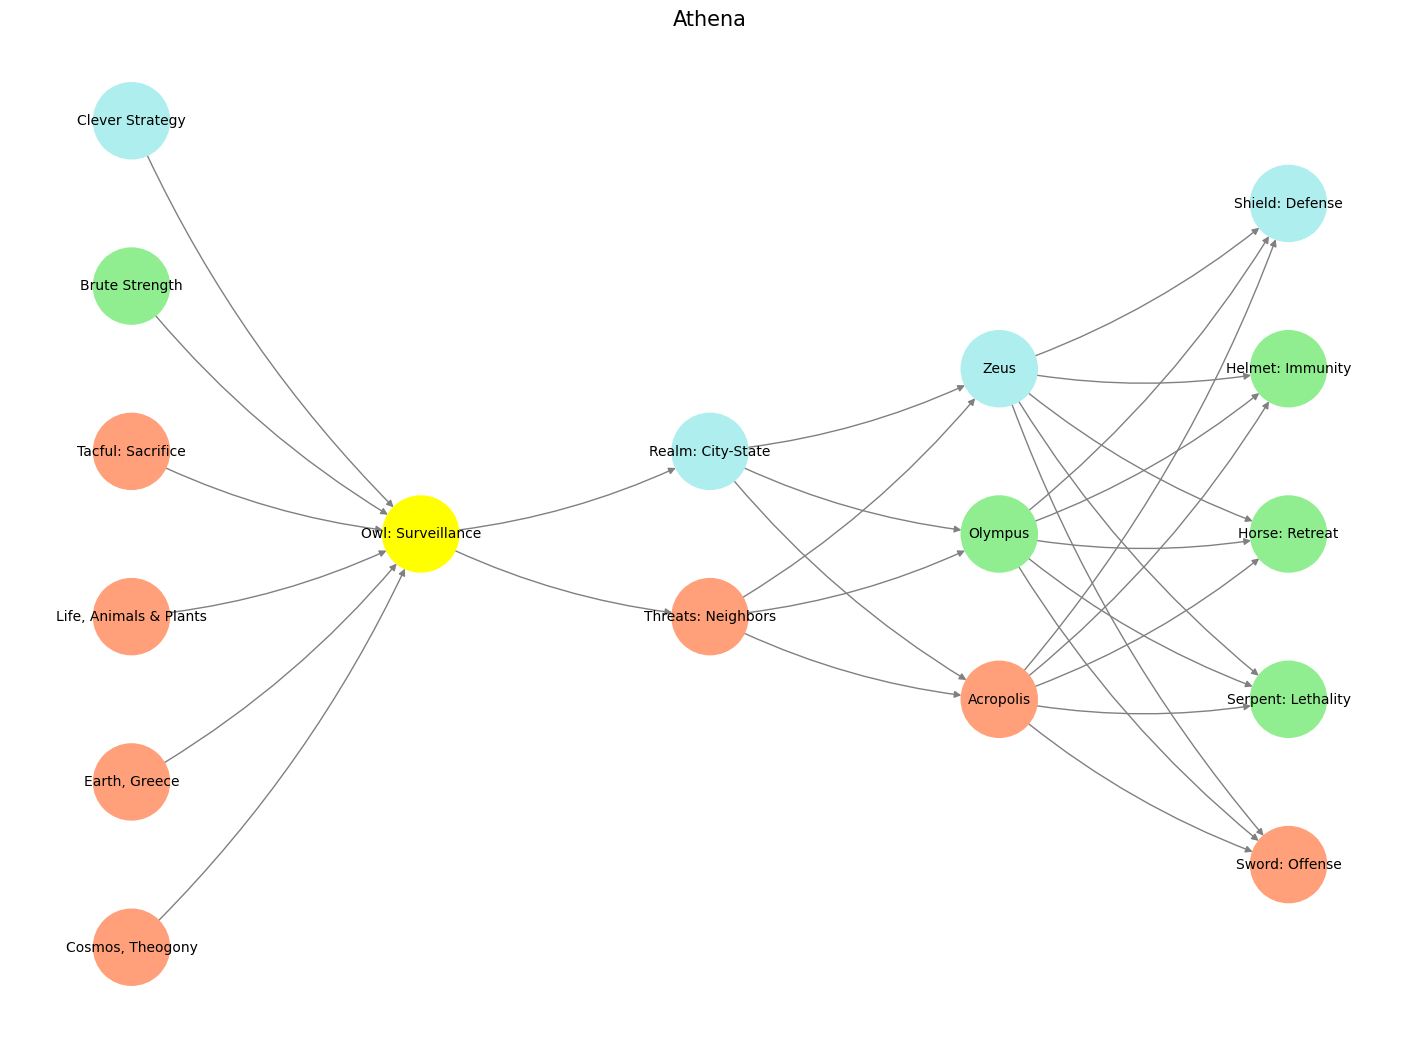

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        # Divine and narrative framework in the film
        'World': [
            'Cosmos, Theogony',  # Guido’s grand, universal sense of play and creativity
            'Earth, Greece',  # The tangible and oppressive reality of the Holocaust
            'Life, Animals & Plants',  # The stakes of survival and human connection
            'Tacful: Sacrifice',  # Guido’s ultimate sacrifice
            'Brute Strength',  # Giosuè’s personal narrative, shaped by his father 👨🏾💪🏾
            'Clever Strategy'  # The "gift" of innocence and joy given by Guido 👩🏾🧠
        ],
        # Perception and filtering of reality
        'Perception': ['Owl: Surveillance'],  # 🦉 How Giosuè interprets his father’s actions and words
        # Agency and Guido’s defining traits
        'Agency': ['Threats: Neighbors', 'Realm: City-State'],  # Guido’s tools for shaping the narrative
        # Generativity and legacy
        'Generativity': [
            'Acropolis',  # Guido’s rebellion against oppressive reality
            'Olympus',  # The systemic constraints he navigates
            'Zeus'  # The actions and sacrifices Guido made for his son
        ],
        # Physical realities and their interplay
        'Physicality': [
            'Sword: Offense',  # Guido’s improvisational actions, like creating the “game” 🗡️ 
            'Serpent: Lethality',  # The direct oppression he faces 🐍 
            'Horse: Retreat',  # Shared humanity and joy despite hardship 🐎 
            'Helmet: Immunity',  # Universal themes transcending sides 🪖 
            'Shield: Defense'  # The immovable, tragic finality of the Holocaust 🛡️
        ]
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Owl: Surveillance':
        return 'yellow'  # Perception as the interpretive bridge
    if layer == 'World' and node == 'Clever Strategy':
        return 'paleturquoise'  # Optimism and the "gift"
    if layer == 'World' and node == 'Brute Strength':
        return 'lightgreen'  # Harmony and legacy
    if layer == 'World' and node in ['Cosmos', 'Earth']:
        return 'lightgray'  # Context of divine and tangible
    elif layer == 'Agency' and node == 'Realm: City-State':
        return 'paleturquoise'  # Guido’s defining hope
    elif layer == 'Generativity':
        if node == 'Zeus':
            return 'paleturquoise'  # Guido’s ultimate acts of selflessness
        elif node == 'Olympus':
            return 'lightgreen'  # Navigating systemic structures
        elif node == 'Acropolis':
            return 'lightsalmon'  # Rebellion and creativity
    elif layer == 'Physicality':
        if node == 'Shield: Defense':
            return 'paleturquoise'  # The unchanging, tragic realities
        elif node in ['Helmet: Immunity', 'Horse: Retreat', 'Serpent: Lethality']:
            return 'lightgreen'  # Shared humanity and resilience
        elif node == 'Sword: Offense':
            return 'lightsalmon'  # Guido’s improvisation and vitality
    return 'lightsalmon'  # Default color for tension or conflict

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges (without weights)
    for layer_pair in [
        ('World', 'Perception'),  # Giosuè interprets the "World" through "Che Mio"
        ('Perception', 'Agency'),  # Guido’s cheerfulness shapes Giosuè’s perception
        ('Agency', 'Generativity'),  # Guido’s optimism drives his generative actions
        ('Generativity', 'Physicality')  # His legacy plays out in the physical world
    ]:
        source_layer, target_layer = layer_pair
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, connectionstyle="arc3,rad=0.1"
    )
    plt.title("Athena", fontsize=15)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_Teleology is an Illusion._ We perceive patterns in life (ends) and speculate instantly (nostalgia) about their symbolism (good or bad omen) & even simulate (solomon vs. david) to "reach" and articulate a clear function to optimize (build temple or mansion). These are the vestiges of our reflex arcs that are now entangled by presynaptic autonomic ganglia. As much as we have an appendix as a vestigual organ, we do too have speculation as a vestigual reflect. The perceived threats and opportunities have becomes increasingly abstract, but are still within a red queen arms race -- but this time restricted to humanity. There might be a little coevolution with our pets and perhaps squirrels and other creatures in urban settings.
```




#